Работа с данными - чтение и запись CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/Economic.csv")

In [9]:
df.info()
print(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB
                     count          mean 

Данный график представляет собой гистограмму со средней инфляцией каждой страны за 40 лет.

['United States of America' 'United Kingdom' 'India' 'Japan' 'Hong Kong'
 'China' 'Germany' 'France' 'Spain']


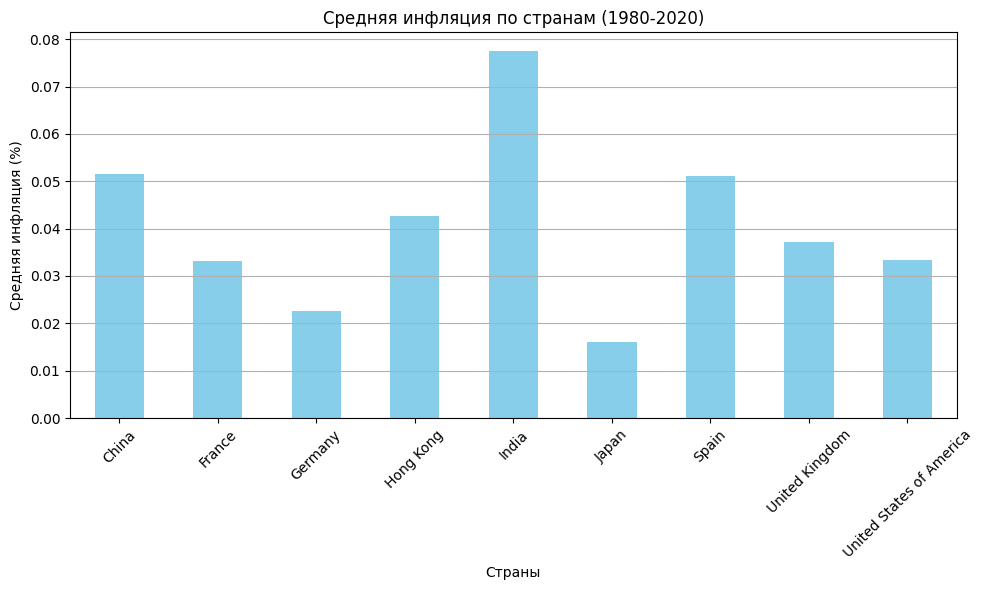

In [2]:
s_values = df["country"].unique()
print(s_values)

average_inflation = df.groupby('country')['inflationrate'].mean()

# Создание гистограммы
plt.figure(figsize=(10, 6))
average_inflation.plot(kind='bar', color='skyblue')
plt.title('Средняя инфляция по странам (1980-2020)')
plt.xlabel('Страны')
plt.ylabel('Средняя инфляция (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показываем график
plt.tight_layout()
plt.show()



Данный график представляет собой точечную диаграмма, на которой указаны соотношение цен на бензин и дохода на душу населения только Китая за 40 лет.

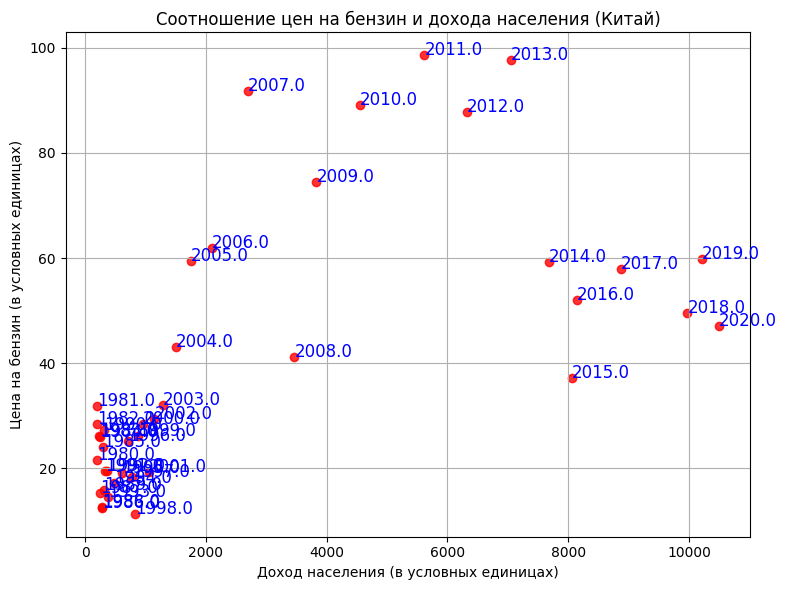

In [3]:
china_data = df[df['country'] == 'China']


# Создание диаграммы разброса
plt.figure(figsize=(8, 6))
plt.scatter(china_data['percapitaincome'], china_data['oil prices'], color='red', alpha=0.8)

# Добавляем подписи и заголовок
plt.title('Соотношение цен на бензин и дохода населения (Китай)')
plt.xlabel('Доход населения (в условных единицах)')
plt.ylabel('Цена на бензин (в условных единицах)')

# Настраиваем сетку
plt.grid(True)

# Добавляем аннотацию для Китая
for i in range(len(china_data)):
    plt.annotate(china_data['year'].iloc[i], (china_data['percapitaincome'].iloc[i], china_data['oil prices'].iloc[i]), fontsize=12, color='blue')

# Показываем график
plt.tight_layout()
plt.show()

Данный график представляет собой график с маркерами курса валюты Индии к USD за 40 лет

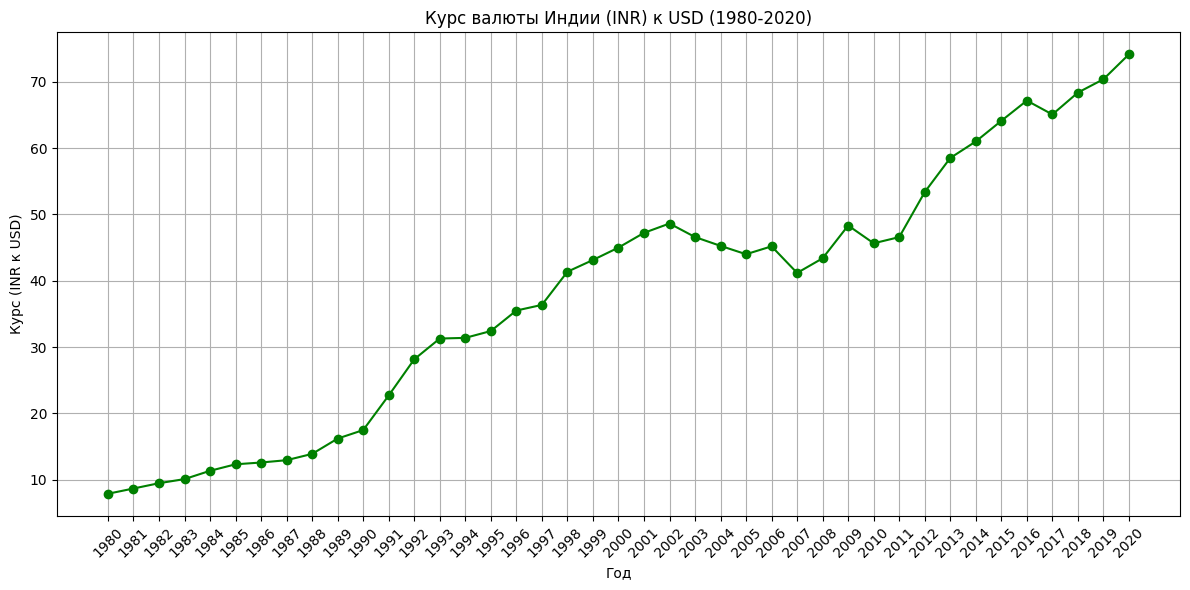

In [4]:
india_data = df[df['country'] == 'India']


# Создание диаграммы временных рядов
plt.figure(figsize=(12, 6))
plt.plot(india_data['year'], india_data['exchange_rate'], marker='o', color='green', linestyle='-')

# Добавляем подписи и заголовок
plt.title('Курс валюты Индии (INR) к USD (1980-2020)')
plt.xlabel('Год')
plt.ylabel('Курс (INR к USD)')

# Настраиваем сетку
plt.grid(True)

# Показываем график
plt.xticks(india_data['year'], rotation=45)
plt.tight_layout()
plt.show()